In [77]:
import pandas as pd
#import geopandas as gpd
import numpy as np
import urllib
import glob
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [33]:
df_x = df[(df.price >= 78000) & (df.price <= 300000)]

In [34]:
df_y = df[(df.price >= 300001) & (df.price <= 800000)]

In [35]:
df_z = df[(df.price >= 800001) & (df.price <= 7700000)]

In [36]:
url = 'https://raw.githubusercontent.com/lavsz/dsc-mod-2-project-v2-1-onl01-dtsc-pt-052620/master/kc_house_data.csv'

In [37]:
df = pd.read_csv(url)

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [40]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [41]:
with pd.option_context('display.max_columns', 40):
    print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

In [42]:
# 33 bedrooms seems very odd and need to check out the size of the house
bed_33 = df[df.bedrooms == 33]
bed_33

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [43]:
# Based on the number of bathrooms, living sqft, it is definitely a typo
# The value will be corrected to 3 instead
df.bedrooms = df.bedrooms.replace({33: 3})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe533c84790>,
      dtype=object)

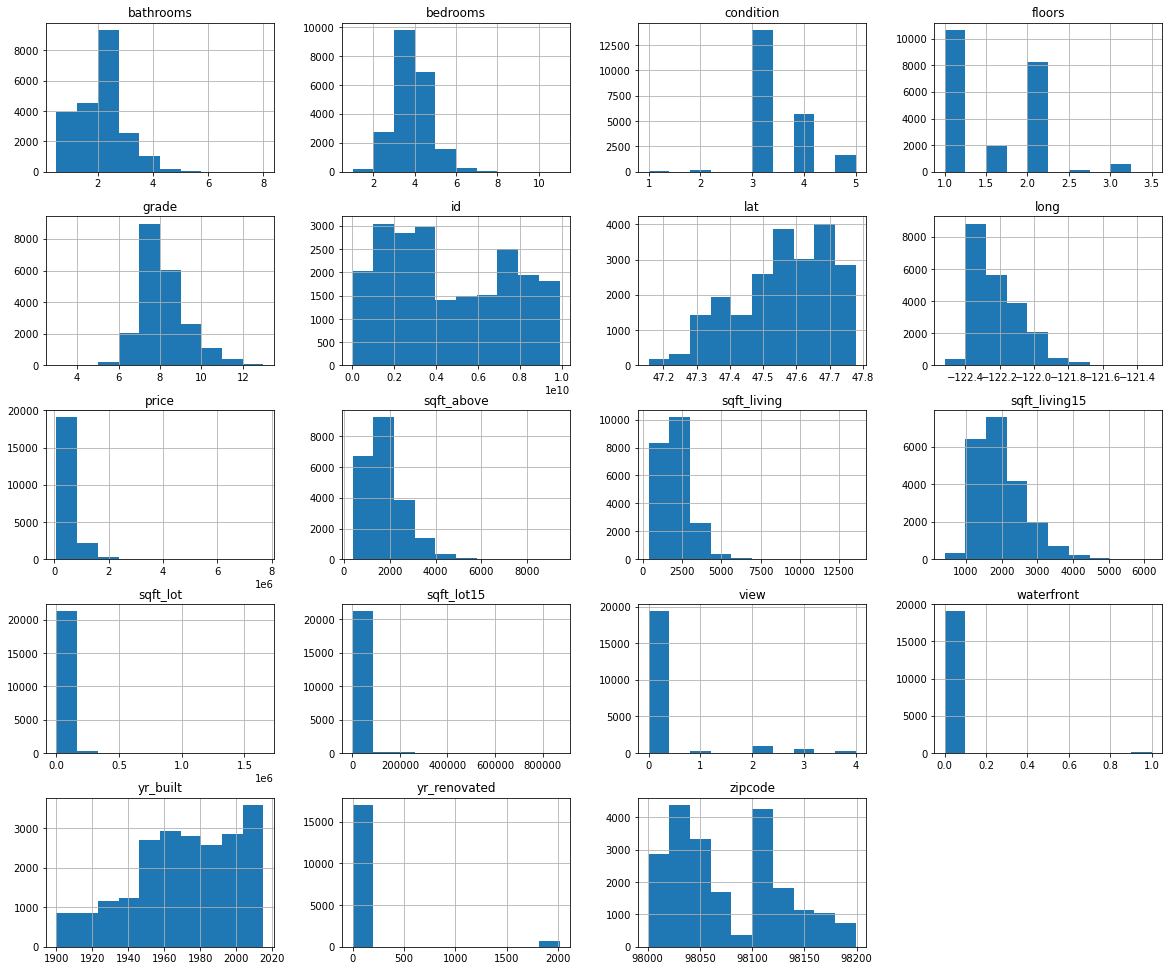

In [44]:
## Use histograms to find other outliers:
df.hist(figsize=(20,17))

In [45]:
# Are there repeating IDs?
df.id.nunique()

21420

In [46]:
# Unique ID values are less than the total entries
# There are either duplicate entries 
# Or the same house was return to the market within a short period of time
ids = df.id
duplicates = df[ids.isin(ids[ids.duplicated()])].sort_values(by=["id"])
duplicates.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [47]:
# Find out if a house was on the market for more than twice
duplicates.id.value_counts()

795000620     3
8651402750    2
5536100020    2
7387500235    2
9238500040    2
             ..
2143700830    2
3271300955    2
1901600090    2
3323059027    2
2023049218    2
Name: id, Length: 176, dtype: int64

In [48]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

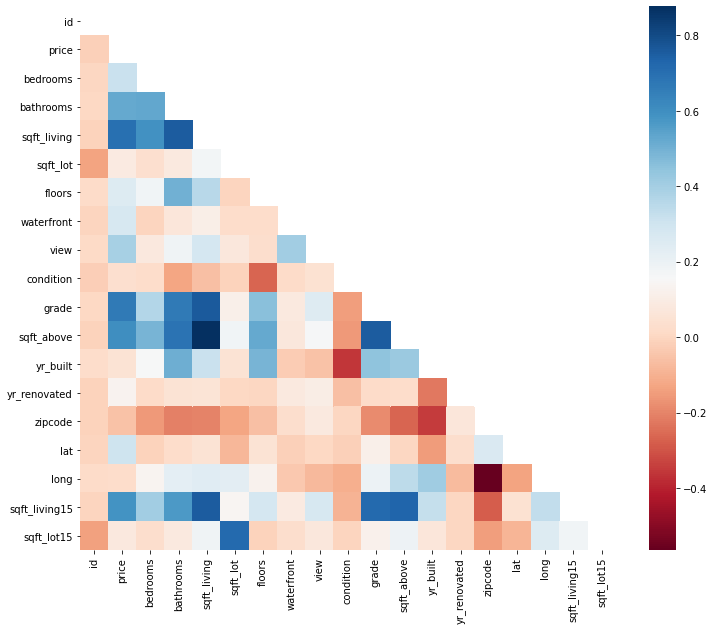

In [49]:
# Corr
plt.figure(figsize=(12,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='RdBu')


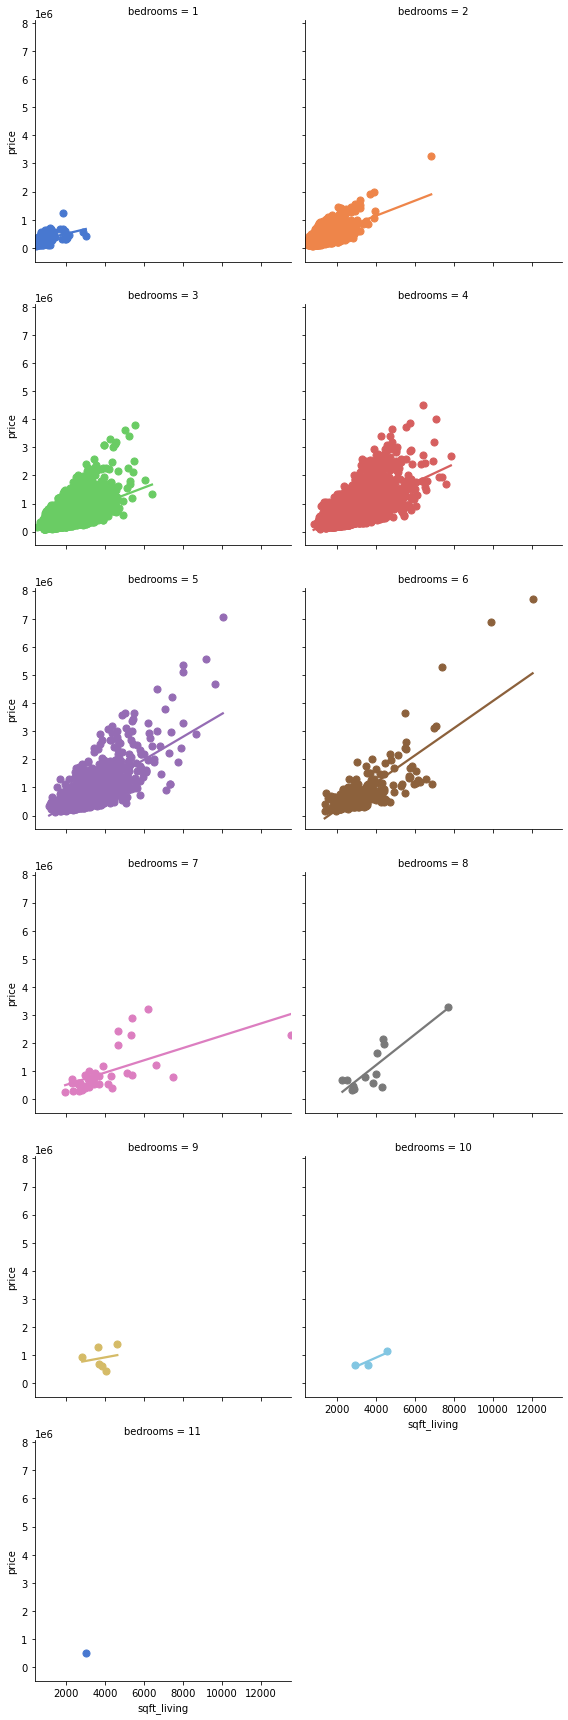

In [50]:
sns.lmplot(x="sqft_living", y="price", col="bedrooms", hue="bedrooms", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

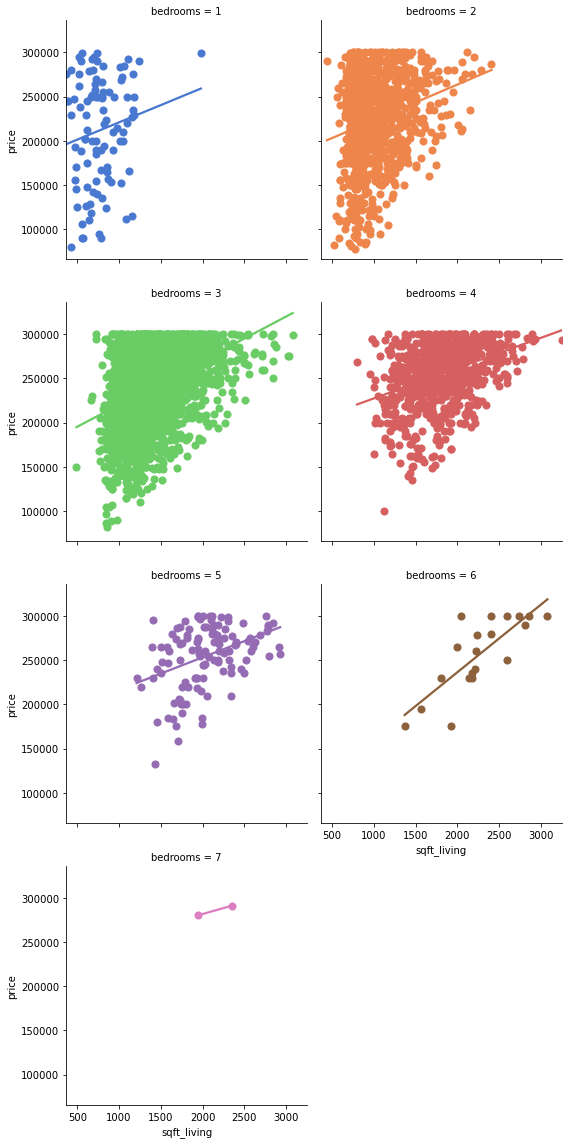

In [62]:
sns.lmplot(x="sqft_living", y="price", col="bedrooms", hue="bedrooms", data=df_x,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

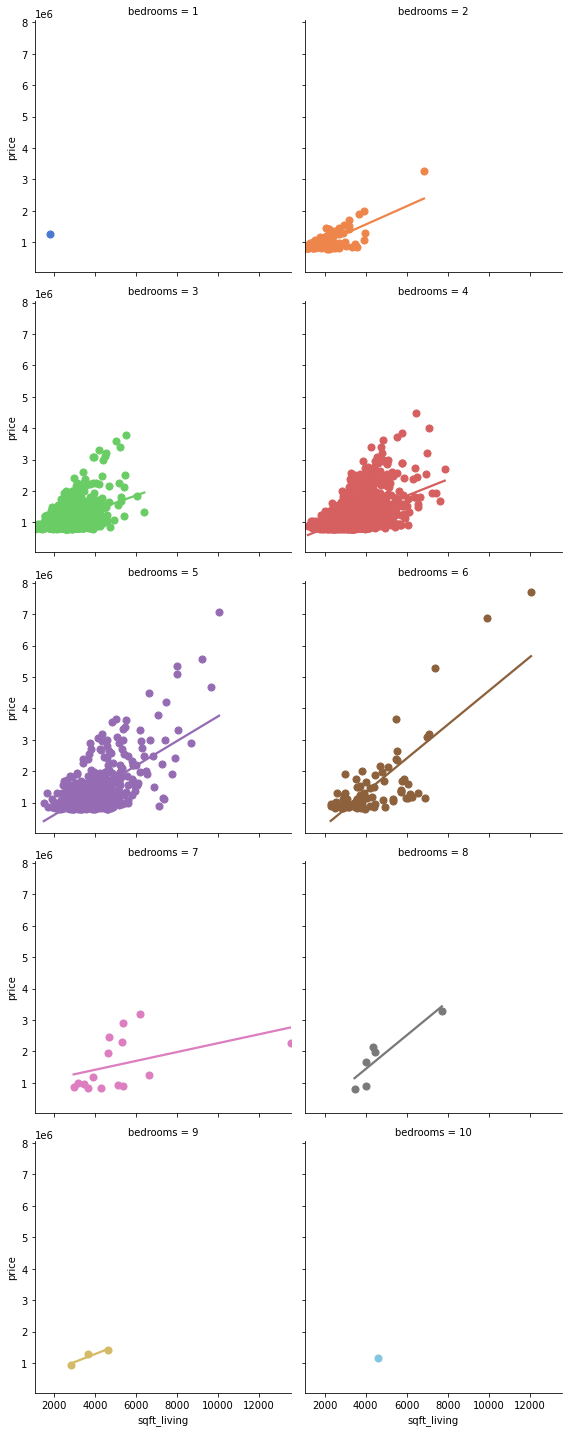

In [64]:
sns.lmplot(x="sqft_living", y="price", col="bedrooms", hue="bedrooms", data=df_z,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

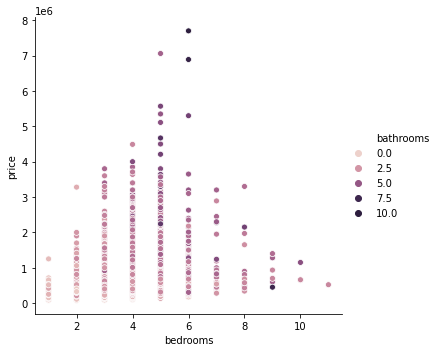

In [52]:
sns.relplot(x="bedrooms", y="price", hue="bathrooms", data=df)

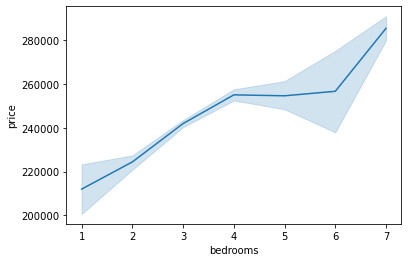

In [53]:
ax = sns.lineplot(x="bedrooms", y="price", data=df_x)

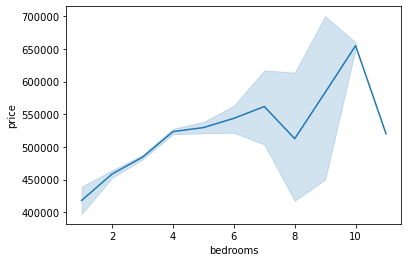

In [54]:
ax = sns.lineplot(x="bedrooms", y="price", data=df_y)

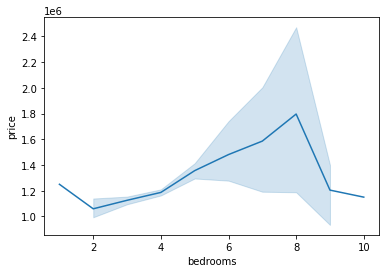

In [56]:
ax = sns.lineplot(x="bedrooms", y="price", data=df_z)

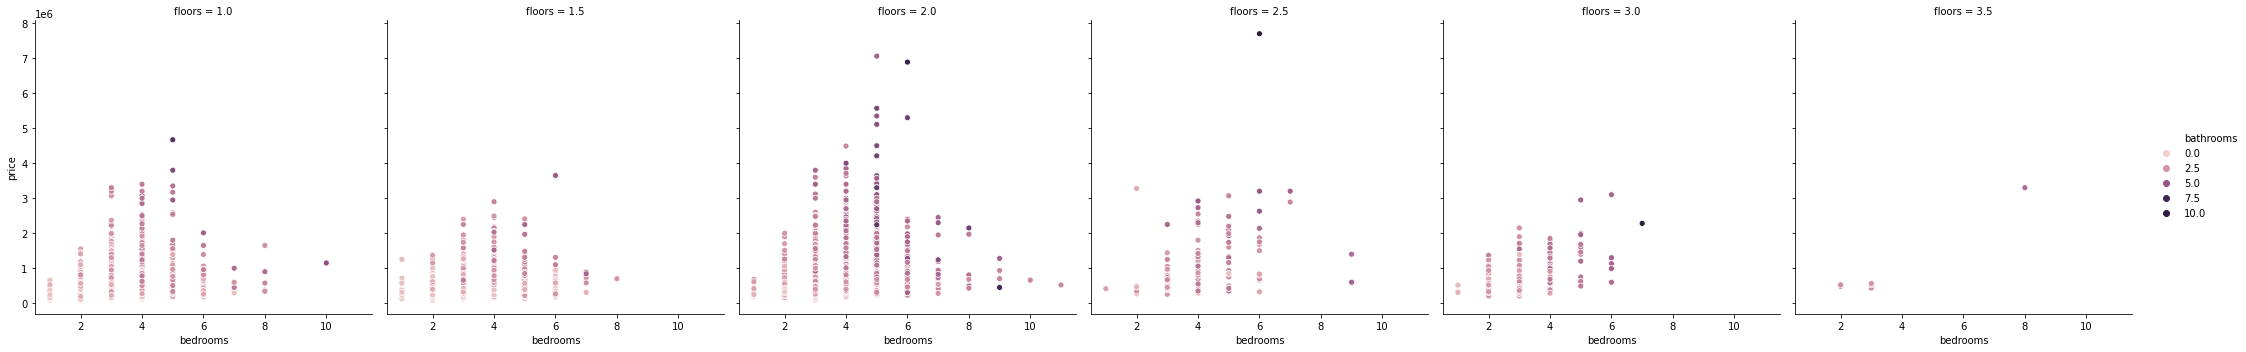

In [60]:
# change figsize
sns.relplot(x="bedrooms", y="price", hue="bathrooms",
            col="floors", data=df);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

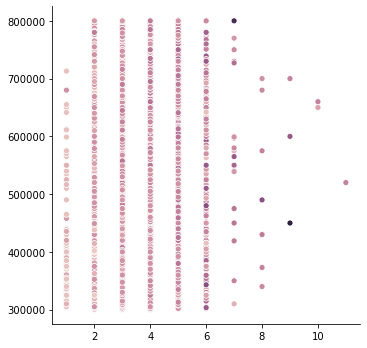

In [61]:
sns.relplot(x=df_y['bedrooms'], y= df_y['price'], hue= df_y['bathrooms'], data=df)

In [58]:
def make_ols(df, columns_to_use, columns_to_drop=None, target='price', add_constant=False):
    if columns_to_drop:
        columns_to_drop.append(target)
        X = df.drop(columns=columns_to_drop)
    else:
        X = df[columns_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    return res


def make_sklearn_ols():
    return 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [83]:
make_ols(df_x, columns_to_use=['sqft_living', 'bedrooms', 'bathrooms', 'floors'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.192e+04
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:48:10   Log-Likelihood:                         -56203.
No. Observations:                4561   AIC:                                  1.124e+05
Df Residuals:                    4557   BIC:                                  1.124e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living    45.2518      2.831     15.986      0.000      39.702      50.801
bedrooms     2.944e+04   1128.839     26.083      0.000    2.72e+04    3.17e+04
bathrooms    7576.9408   2006.036      3.777      0.000    3644.139    1.15e+04
floors       5.407e+04   1961.053     27.572      0.000    5.02e+04    5.79e+04
==============================================================================
Omnibus:                        1.791   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.775
Skew:                           0.020   Prob(JB):                        0.412
Kurtosis:                       3.088   Cond. No.                     4.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
make_ols(df_y, columns_to_use=['sqft_living', 'bedrooms', 'bathrooms', 'floors'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          4.195e+04
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:47:56   Log-Likelihood:                     -1.8732e+05
No. Observations:               14093   AIC:                                  3.746e+05
Df Residuals:                   14089   BIC:                                  3.747e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living    92.9923      2.545     36.533      0.000      88.003      97.982
bedrooms     4.773e+04   1424.435     33.506      0.000    4.49e+04    5.05e+04
bathrooms    1.117e+04   2688.911      4.155      0.000    5900.906    1.64e+04
floors       7.159e+04   2290.979     31.247      0.000    6.71e+04    7.61e+04
==============================================================================
Omnibus:                       13.398   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.882
Skew:                           0.018   Prob(JB):                      0.00263
Kurtosis:                       2.863   Cond. No.                     5.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
make_ols(df_z, columns_to_use=['sqft_living', 'bedrooms', 'bathrooms', 'floors'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              5637.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:47:32   Log-Likelihood:                         -42497.
No. Observations:                2943   AIC:                                  8.500e+04
Df Residuals:                    2939   BIC:                                  8.503e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   290.1783     11.317     25.641      0.000     267.988     312.369
bedrooms    -1092.8511   8630.626     -0.127      0.899    -1.8e+04    1.58e+04
bathrooms    7.586e+04   1.51e+04      5.020      0.000    4.62e+04    1.05e+05
floors       -473.2707    1.6e+04     -0.030      0.976   -3.18e+04    3.09e+04
==============================================================================
Omnibus:                     1084.055   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7624.726
Skew:                           1.571   Prob(JB):                         0.00
Kurtosis:                      10.232   Cond. No.                     7.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
make_ols(df, columns_to_use=['bedrooms'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          5.381e+04
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:00:42   Log-Likelihood:                     -3.0632e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21596   BIC:                                  6.127e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.581e+05    681.566    231.970      0.000    1.57e+05    1.59e+05
==============================================================================
Omnibus:                    18235.335   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043119.245
Skew:                           3.736   Prob(JB):                         0.00
Kurtosis:                      36.217   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""